<a href="https://colab.research.google.com/github/ExplorerGumel/ArewaDS-Pytorch-Fellowship-Solutions/blob/main/Week_03%20-%20Pytorch_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 02. PyTorch Classification Solution



## Resources
* These exercises are based on [notebook 02 of the learn PyTorch course](https://www.learnpytorch.io/02_pytorch_classification/).
* You can see one form of [solutions on GitHub](https://github.com/mrdbourke/pytorch-deep-learning/tree/main/extras/solutions) (but try the exercises below yourself first!).

In [ ]:
# Import torch
import torch
from torch import nn
# Setup device agnostic code
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

print(f"The device in use in {device}")

# Setup random seed
RANDOM_SEED = 42

The device in use in cuda


## 1. Make a binary classification dataset with Scikit-Learn's [`make_moons()`](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_moons.html) function.
  * For consistency, the dataset should have 1000 samples and a `random_state=42`.
  * Turn the data into PyTorch tensors.
  * Split the data into training and test sets using `train_test_split` with 80% training and 20% testing.

In [ ]:
# Create a dataset with Scikit-Learn's make_moons()
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=1000, shuffle=True, noise=0.0004, random_state=42)

In [ ]:
# Turn data into a DataFrame
import pandas as pd
data = pd.DataFrame({"X1": X[:, 0],
    "X2": X[:, 1],
    "label": y
})

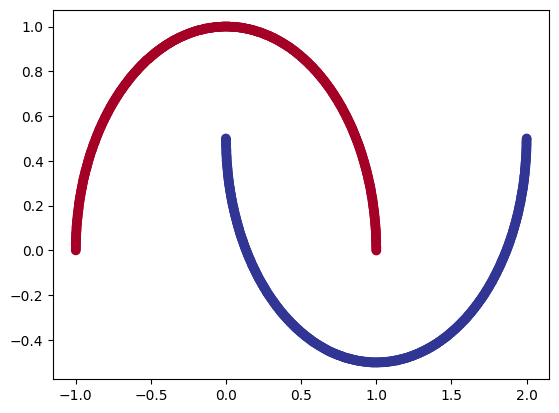

In [ ]:
# Visualize the data on a scatter plot
import matplotlib.pyplot as plt

plt.scatter(x=X[:, 0],
            y=X[:, 1],
            c=y,
            cmap=plt.cm.RdYlBu);

In [ ]:
# Turn data into tensors of dtype float
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

# Split the data into train and test sets (80% train, 20% test)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2, # 20% test, 80% train
                                                    random_state=42) # set tandom state for reproducible

len(X_train), len(X_test), len(y_train), len(y_test)

(800, 200, 800, 200)

In [ ]:
import numpy as np
import pandas as pd
pd.DataFrame(np.array(y_test.cpu())).value_counts()

0.0    100
1.0    100
dtype: int64

## 2. Build a model by subclassing `nn.Module` that incorporates non-linear activation functions and is capable of fitting the data you created in 1.
  * Feel free to use any combination of PyTorch layers (linear and non-linear) you want.

In [ ]:
torch.manual_seed(42)

# Inherit from nn.Module to make a model capable of fitting the mooon data
class MoonModelV0(nn.Module):
    def __init__(self):
      super().__init__()

      self.layer1 = nn.Linear(in_features=2, out_features=4) #first layer accepting 2 features and regressing 8 features out
      self.layer2 = nn.Linear(in_features=4, out_features=8) #first layer accepting 8 features and regressing 10 features out
      self.layer3 = nn.Linear(in_features=8, out_features=1) #first layer accepting 10 features and regressing 1 features out
      self.relu = nn.ReLU() # Relu activation for non-linearity


    def forward(self, x):
        ## Your code here ##
        return self.layer3(self.relu(self.layer2(self.relu(self.layer1(x))))) # sequencing the layers one over another

# Instantiate the model
## Your code here ##

Moon_model = MoonModelV0().to(device)
Moon_model

MoonModelV0(
  (layer1): Linear(in_features=2, out_features=4, bias=True)
  (layer2): Linear(in_features=4, out_features=8, bias=True)
  (layer3): Linear(in_features=8, out_features=1, bias=True)
  (relu): ReLU()
)

## 3. Setup a binary classification compatible loss function and optimizer to use when training the model built in 2.

In [ ]:
torch.manual_seed(42)

# Setup loss function
loss_fn = nn.BCEWithLogitsLoss()
# Setup optimizer to optimize model's parameters
optimizer = torch.optim.Adam(Moon_model.parameters(), lr=1, weight_decay=3e-5) # weight_decay for regularization

## 4. Create a training and testing loop to fit the model you created in 2 to the data you created in 1.
  * Do a forward pass of the model to see what's coming out in the form of logits, prediction probabilities and labels.
  * To measure model accuray, you can create your own accuracy function or use the accuracy function in [TorchMetrics](https://torchmetrics.readthedocs.io/en/latest/).
  * Train the model for long enough for it to reach over 96% accuracy.
  * The training loop should output progress every 10 epochs of the model's training and test set loss and accuracy.

In [ ]:
# What's coming out of our model?
torch.manual_seed(42)
epochs = 1000

# Put all data on target device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

# logits (raw outputs of model)
logits = Moon_model(X_test)
print("Logits:",logits[:5])
## Your code here ##

# Prediction probabilities
pred_probs =  torch.sigmoid(logits)
print("Pred probs:",pred_probs[:5])
## Your code here ##

# Prediction labels
pred_label = torch.round(pred_probs)
print("Pred labels:",pred_label[30:40])
## Your code here ##

Logits: tensor([[-0.0959],
        [-0.1709],
        [-0.1081],
        [-0.1831],
        [-0.1164]], device='cuda:0', grad_fn=<SliceBackward0>)
Pred probs: tensor([[0.4760],
        [0.4574],
        [0.4730],
        [0.4544],
        [0.4709]], device='cuda:0', grad_fn=<SliceBackward0>)
Pred labels: tensor([[0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.]], device='cuda:0', grad_fn=<SliceBackward0>)


In [ ]:
# Let's calculuate the accuracy using accuracy from TorchMetrics
!pip -q install torchmetrics # Colab doesn't come with torchmetrics
from torchmetrics import Accuracy

## TODO: Uncomment this code to use the Accuracy function
acc_fn = Accuracy(task="multiclass", num_classes=2).to(device) # send accuracy function to device
acc_fn

MulticlassAccuracy()

In [ ]:
## TODO: Uncomment this to set the seed
torch.manual_seed(RANDOM_SEED)

# Setup epochs
epochs = 1000

# Send data to the device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

# Loop through the data
for epoch in range(epochs):
  ### Training
  Moon_model.train()

  # 1. Forward pass (logits output)
  y_logits = Moon_model(X_train).squeeze()
  # Turn logits into prediction probabilities
  y_pred = torch.sigmoid(y_logits)

  # Turn prediction probabilities into prediction labels
  y_labels = torch.round(y_pred)
  # 2. Calculaute the loss
  loss = loss_fn(y_logits, y_train) # loss = compare model raw outputs to desired model outputs

  # Calculate the accuracy
  acc = acc_fn(y_labels, y_train.int()) # the accuracy function needs to compare pred labels (not logits) with actual labels

  # 3. Zero the gradients
  optimizer.zero_grad()

  loss.backward()

  optimizer.step()

  ### Testing
  Moon_model.eval()
  with torch.inference_mode():

    # 1. Forward pass (to get the logits)
    test_logits = Moon_model(X_test).squeeze()
    # Turn the test logits into prediction labels
    test_pred = torch.round(torch.sigmoid(test_logits))
    # 2. Caculate the test loss/acc

    # 2. Calculaute the loss
    test_loss = loss_fn(test_logits, y_test) # loss = compare model raw outputs to desired model outputs

    # Calculate the accuracy
    test_acc = acc_fn(test_pred, y_test.int()) # the accuracy function needs to compare pred labels (not logits) with actual labels



  # Print out what's happening every 100 epochs
  if epoch % 100 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f}, Accuracy: {acc:.2f}% | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%")


Epoch: 0 | Loss: 0.68114, Accuracy: 0.50% | Test loss: 0.76509, Test acc: 0.80%
Epoch: 100 | Loss: 0.22737, Accuracy: 0.92% | Test loss: 0.28009, Test acc: 0.88%
Epoch: 200 | Loss: 0.22777, Accuracy: 0.92% | Test loss: 0.27923, Test acc: 0.88%
Epoch: 300 | Loss: 0.22751, Accuracy: 0.92% | Test loss: 0.28106, Test acc: 0.88%
Epoch: 400 | Loss: 0.22751, Accuracy: 0.92% | Test loss: 0.28107, Test acc: 0.88%
Epoch: 500 | Loss: 0.22751, Accuracy: 0.92% | Test loss: 0.28106, Test acc: 0.88%
Epoch: 600 | Loss: 0.22751, Accuracy: 0.92% | Test loss: 0.28107, Test acc: 0.88%
Epoch: 700 | Loss: 0.22752, Accuracy: 0.92% | Test loss: 0.28107, Test acc: 0.88%
Epoch: 800 | Loss: 0.22639, Accuracy: 0.91% | Test loss: 0.26039, Test acc: 0.89%
Epoch: 900 | Loss: 0.23487, Accuracy: 0.92% | Test loss: 0.29240, Test acc: 0.89%


## 5. Make predictions with your trained model and plot them using the `plot_decision_boundary()` function created in this notebook.

In [ ]:
# Plot the model predictions
import numpy as np

def plot_decision_boundary(model, X, y):

    # Put everything to CPU (works better with NumPy + Matplotlib)
    model.to("cpu")
    X, y = X.to("cpu"), y.to("cpu")

    # Source - https://madewithml.com/courses/foundations/neural-networks/
    # (with modifications)
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 101),
                         np.linspace(y_min, y_max, 101))

    # Make features
    X_to_pred_on = torch.from_numpy(np.column_stack((xx.ravel(), yy.ravel()))).float()

    # Make predictions
    model.eval()
    with torch.inference_mode():
        y_logits = model(X_to_pred_on)

    # Test for multi-class or binary and adjust logits to prediction labels
    if len(torch.unique(y)) > 2:
        y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1) # mutli-class
    else:
        y_pred = torch.round(torch.sigmoid(y_logits)) # binary

    # Reshape preds and plot
    y_pred = y_pred.reshape(xx.shape).detach().numpy()
    plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

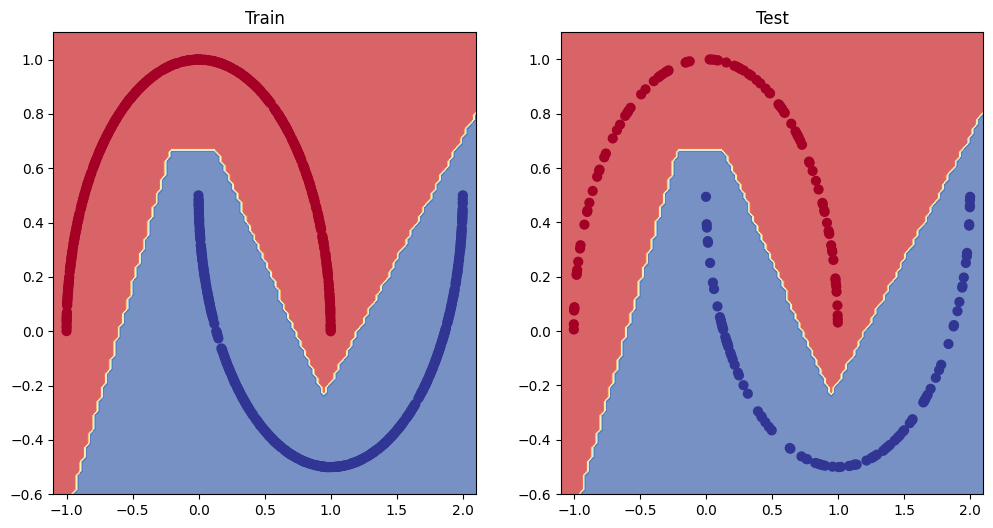

In [ ]:
# Plot decision boundaries for training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(Moon_model, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(Moon_model, X_test, y_test)



## 6. Replicate the Tanh (hyperbolic tangent) activation function in pure PyTorch.
  * Feel free to reference the [ML cheatsheet website](https://ml-cheatsheet.readthedocs.io/en/latest/activation_functions.html#tanh) for the formula.

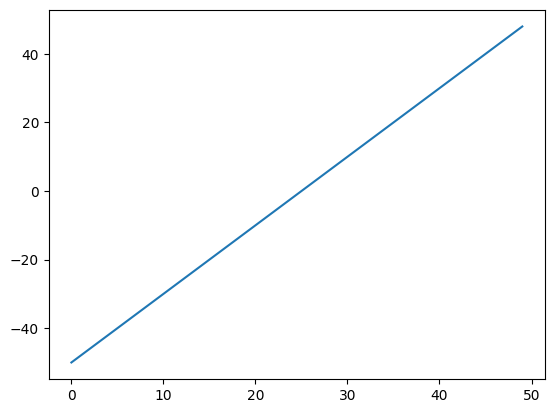

In [ ]:
# Create a straight line tensor
X = torch.arange(-50, 50, 2, dtype=torch.float32)
# Create data
plt.plot(X)

In [ ]:
# Test torch.tanh() on the tensor and plot it
def tanh(z):
	return (np.exp(z) - np.exp(-z)) / (np.exp(z) + np.exp(-z))

tanh_X = tanh(X)

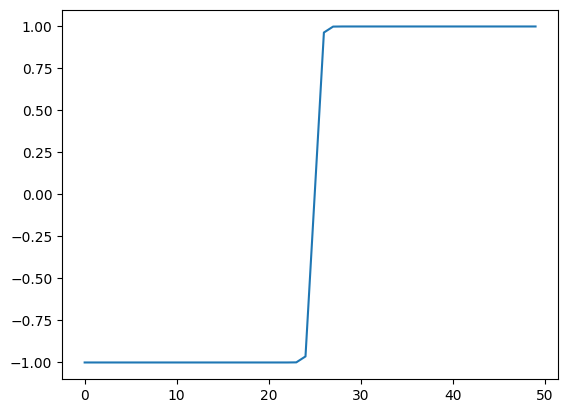

In [ ]:
# Replicate torch.tanh() and plot it
plt.plot(tanh_X)

## 7. Create a multi-class dataset using the [spirals data creation function from CS231n](https://cs231n.github.io/neural-networks-case-study/) (see below for the code).
  * Split the data into training and test sets (80% train, 20% test) as well as turn it into PyTorch tensors.
  * Construct a model capable of fitting the data (you may need a combination of linear and non-linear layers).
  * Build a loss function and optimizer capable of handling multi-class data (optional extension: use the Adam optimizer instead of SGD, you may have to experiment with different values of the learning rate to get it working).
  * Make a training and testing loop for the multi-class data and train a model on it to reach over 95% testing accuracy (you can use any accuracy measuring function here that you like) - 1000 epochs should be plenty.
  * Plot the decision boundaries on the spirals dataset from your model predictions, the `plot_decision_boundary()` function should work for this dataset too.

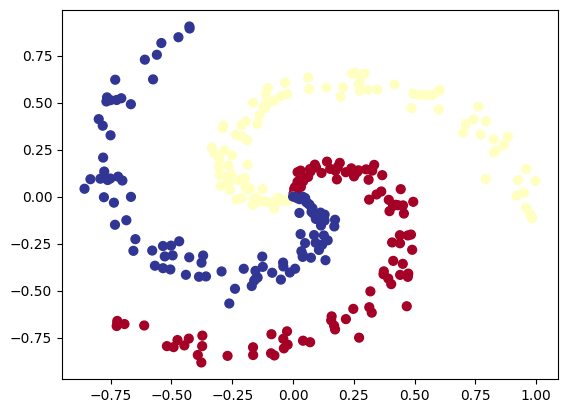

In [ ]:
# Code for creating a spiral dataset from CS231n
import numpy as np
import matplotlib.pyplot as plt
RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)
N = 100 # number of points per class
D = 2 # dimensionality
K = 3 # number of classes
X = np.zeros((N*K,D)) # data matrix (each row = single example)
y = np.zeros(N*K, dtype='uint8') # class labels
for j in range(K):
  ix = range(N*j,N*(j+1))
  r = np.linspace(0.0,1,N) # radius
  t = np.linspace(j*4,(j+1)*4,N) + np.random.randn(N)*0.2 # theta
  X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
  y[ix] = j
# lets visualize the data
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
plt.show()

In [ ]:
# Turn data into tensors
import torch
X = torch.from_numpy(X).type(torch.float) # features as float32
y = torch.from_numpy(y).type(torch.LongTensor) # labels need to be of type long

# Create train and test splits
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2, # 20% test, 80% train
                                                    random_state=42) # set tandom state for reproducible


In [ ]:
# Let's calculuate the accuracy for when we fit our model
!pip -q install torchmetrics # colab doesn't come with torchmetrics
from torchmetrics import Accuracy

## TODO: uncomment the two lines below to send the accuracy function to the device
acc_fn = Accuracy(task="multiclass", num_classes=4).to(device)
acc_fn

MulticlassAccuracy()

In [ ]:
# Prepare device agnostic code
# device = "cuda" if torch.cuda.is_available() else "cpu"

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Create model by subclassing nn.Module

import torch
from torch import nn

# Inherit from nn.Module to make a model capable of fitting the mooon data
class SpiralModel(nn.Module):
    def __init__(self):
      super().__init__()

      self.layer1 = nn.Linear(in_features=2, out_features=8) #first layer accepting 2 features and regressing 8 features out
      self.layer2 = nn.Linear(in_features=8, out_features=10) #first layer accepting 8 features and regressing 10 features out
      self.layer3 = nn.Linear(in_features=10, out_features=4) #first layer accepting 10 features and regressing 1 features out
      self.relu = nn.ReLU() # Relu activation for non-linearity
      self.tanh = nn.Tanh()


    def forward(self, x):
        ## Your code here ##
        return self.layer3(self.relu(self.layer2(self.tanh(self.layer1(x))))) # sequencing the layers one over another

# Instantiate model and send it to device

spiral_model = SpiralModel().to(device)
spiral_model


SpiralModel(
  (layer1): Linear(in_features=2, out_features=8, bias=True)
  (layer2): Linear(in_features=8, out_features=10, bias=True)
  (layer3): Linear(in_features=10, out_features=4, bias=True)
  (relu): ReLU()
  (tanh): Tanh()
)

In [ ]:
# Setup data to be device agnostic

# Print out first 10 untrained model outputs (forward pass)
logits = spiral_model(X_train.to(device)).squeeze()
print("Logits:",logits[:2])
## Your code here ##
pred_probs = torch.softmax(logits, dim=1)
print("Pred probs:",pred_probs[:2])
## Your code here ##
pred_labels = torch.softmax(logits, dim=1).argmax(dim=1)
print("Pred labels:",pred_labels[:10])
## Your code here ##

Logits: tensor([[ 0.2709, -0.0448,  0.2409,  0.1869],
        [ 0.2490, -0.0309,  0.2312,  0.2170]], device='cuda:0',
       grad_fn=<SliceBackward0>)
Pred probs: tensor([[0.2763, 0.2015, 0.2681, 0.2540],
        [0.2698, 0.2039, 0.2650, 0.2613]], device='cuda:0',
       grad_fn=<SliceBackward0>)
Pred labels: tensor([0, 0, 0, 3, 3, 0, 0, 0, 3, 3], device='cuda:0')


In [ ]:
# Setup loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.RMSprop(spiral_model.parameters(),
                            lr=1e-2, weight_decay= 3e-3)

In [ ]:
# Build a training loop for the model

# Loop over data
for epoch in range(epochs):

  ## Training
  spiral_model.train()
  # 1. Forward pass
  y_logits = spiral_model(X_train.to(device))
  y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1)
  # 2. Calculate the loss
  loss = loss_fn(y_logits, y_train.to(device))
  acc = acc_fn(y_train.to(device), y_pred)
  # 3. Optimizer zero grad

  optimizer.zero_grad()
  # 4. Loss backward
  loss.backward()

  # 5. Optimizer step
  optimizer.step()

  ## Testing
  spiral_model.eval()
  with torch.inference_mode():
    # 1. Forward pass
    test_logits = spiral_model(X_test.to(device))
    test_pred = torch.softmax(test_logits, dim=1).argmax(dim=1)
    # 2. Caculate loss and acc
    test_loss = loss_fn(test_logits, y_test.to(device))
    test_acc = acc_fn(y_test.to(device), test_pred)
  # Print out what's happening every 100 epochs
  if epoch % 100 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f}, | Accuracy: {acc:.5f} | Test Loss: {test_loss:.5f}, Test Accuracy: {test_acc:.5f} ")

Epoch: 0 | Loss: 1.14910, | Accuracy: 0.32500 | Test Loss: 1.05019, Test Accuracy: 0.45000 
Epoch: 100 | Loss: 0.51720, | Accuracy: 0.72500 | Test Loss: 0.44608, Test Accuracy: 0.73333 
Epoch: 200 | Loss: 0.40840, | Accuracy: 0.79167 | Test Loss: 0.34395, Test Accuracy: 0.86667 
Epoch: 300 | Loss: 0.34695, | Accuracy: 0.82917 | Test Loss: 0.28787, Test Accuracy: 0.90000 
Epoch: 400 | Loss: 0.24895, | Accuracy: 0.93750 | Test Loss: 0.20664, Test Accuracy: 0.95000 
Epoch: 500 | Loss: 0.15888, | Accuracy: 0.96250 | Test Loss: 0.12409, Test Accuracy: 0.98333 
Epoch: 600 | Loss: 0.12433, | Accuracy: 0.97083 | Test Loss: 0.09516, Test Accuracy: 1.00000 
Epoch: 700 | Loss: 0.11850, | Accuracy: 0.96667 | Test Loss: 0.08971, Test Accuracy: 0.98333 
Epoch: 800 | Loss: 0.11458, | Accuracy: 0.96667 | Test Loss: 0.08521, Test Accuracy: 1.00000 
Epoch: 900 | Loss: 0.11345, | Accuracy: 0.97083 | Test Loss: 0.08541, Test Accuracy: 0.98333 


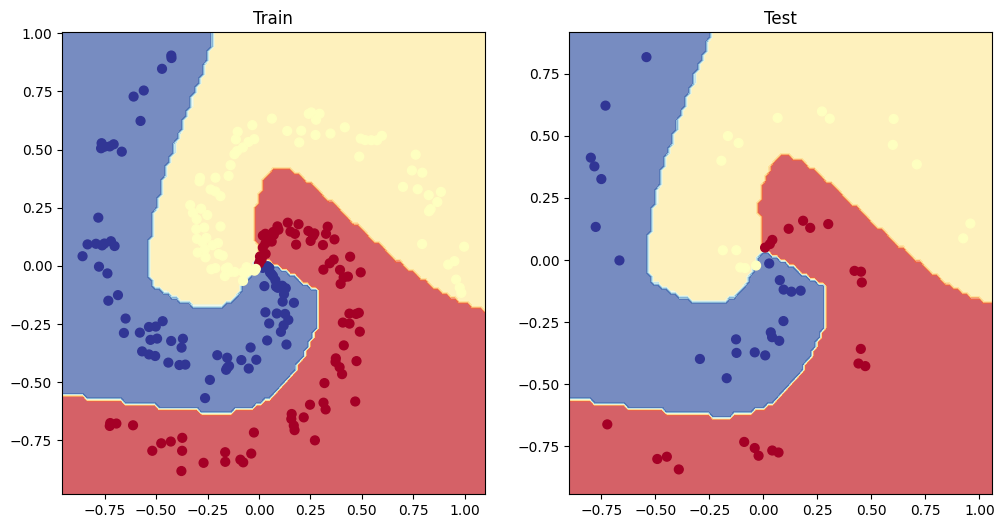

In [ ]:
# Plot decision boundaries for training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(spiral_model, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(spiral_model, X_test, y_test)

